In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
movie_path = os.path.join(os.curdir, 'movielens')
! ls -al $movie_path

total 855112
drwxr-xr-x 2 sgrosu sgrosu      4096 Jul  4 08:43 .
drwxr-xr-x 6 sgrosu sgrosu      4096 Jul  4 13:28 ..
-rw-r--r-- 1 sgrosu sgrosu 323544381 Oct 17  2016 genome-scores.csv
-rw-r--r-- 1 sgrosu sgrosu     18103 Oct 17  2016 genome-tags.csv
-rw-r--r-- 1 sgrosu sgrosu    570090 Oct 17  2016 links.csv
-rw-r--r-- 1 sgrosu sgrosu   1397542 Mar 31  2015 movies.csv
-rw-r--r-- 1 sgrosu sgrosu 533444411 Mar 31  2015 ratings.csv
-rw-r--r-- 1 sgrosu sgrosu     10627 Jul  4 08:50 readme
-rw-r--r-- 1 sgrosu sgrosu     10261 Oct 17  2016 README.txt
-rw-r--r-- 1 sgrosu sgrosu  16603996 Mar 31  2015 tags.csv


In [3]:
!head -5 $movie_path/'movies.csv'

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [4]:
movies = pd.read_csv(os.path.join(movie_path,'movies.csv'),sep=',')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
tags = pd.read_csv(os.path.join(movie_path,'tags.csv'), sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [6]:
ratings = pd.read_csv(os.path.join(movie_path,'ratings.csv'), sep=',')

In [7]:
ratings.rating.value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

In [8]:
ratings.shape

(20000263, 4)

In [9]:
# For our current analysis we will remove the timestamp column from ratings and tags
del tags['timestamp']
del ratings['timestamp']

## Descriptive Statistics

In [10]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [11]:
ratings['rating'].mean()

3.5255285642993797

In [12]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [13]:
# most common rating - mode
ratings.rating.mode()

0    4.0
dtype: float64

In [14]:
ratings.rating.median()

3.5

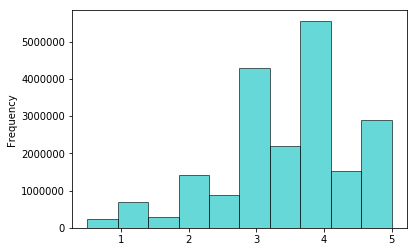

In [15]:
ratings.rating.plot(kind='hist', color = 'c', edgecolor='black', bins=10, alpha= .6)

In [16]:
ratings.rating.value_counts().shape

(10,)

In [17]:
# running correlation on ratings - unfortunately, there being only one column of measured data, the correlation will not be significant
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [18]:
# creating filters
filter_1 = ratings.rating > 5
filter_1.any()

False

In [19]:
filter_2 = ratings.rating > 0
filter_2.all()

True

In [20]:
ratings.mode()

,userId,movieId,rating
0,118205,296,4.0


In [21]:
movies[movies['movieId']==296]

,movieId,title,genres
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


### Fill missing values

In [22]:
# df.fillna(method = 'ffill') # fill with previous value
# df.fillna(method = 'backfill') #  fill with next value

In [23]:
# dropna will drop any row (or column) containing missing values
#df.dropna(axis = 0 | 1)

In [24]:
# interpolation = guess the actual valuea by using a linear (or other types) 
# interpolation between two close values

## Data Cleaning: Handling Missing Data

In [25]:
movies.shape

(27278, 3)

In [26]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [27]:
ratings.shape

(20000263, 3)

In [28]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [29]:
tags.shape

(465564, 3)

In [30]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [31]:
tags = tags.dropna()

In [32]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

## Data Visualization

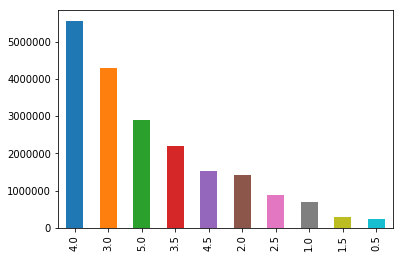

In [34]:
ratings.rating.value_counts().plot.bar()

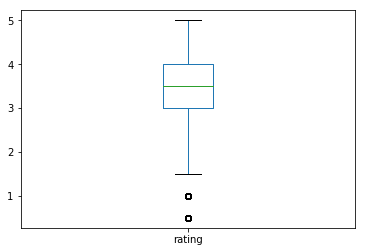

In [35]:
ratings.rating.plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0ccbca940>]],
      dtype=object)

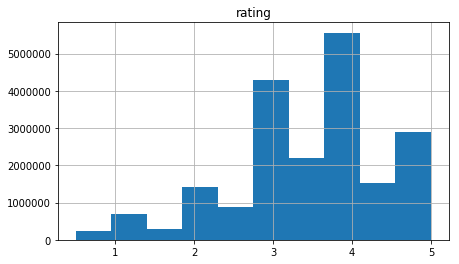

In [38]:
ratings.hist(column='rating', figsize=(7,4))

# Slicing techniques

In [39]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [40]:
tag_counts = tags.tag.value_counts()

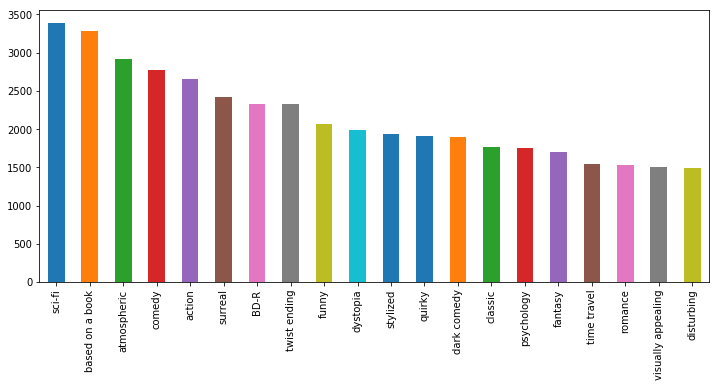

In [46]:
tag_counts[:20].plot(kind='bar',figsize=(12,5))

In [47]:
high_rating = ratings.rating >= 4.0

In [49]:
ratings[high_rating][-5:]

,userId,movieId,rating
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000261,138493,70286,5.0


In [50]:
is_animation = movies.genres.str.contains('Animation')
movies[is_animation].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children


## Groupby and aggregate

In [51]:
ratings_count = ratings[['movieId', 'rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [68]:
ratings_by_movie = ratings.groupby('movieId').agg({'rating':'mean', 'movieId':'count'})#.sort_values('movieId',ascending=False)

In [73]:
ratings_by_movie.shape[0] - ratings_by_movie[ratings_by_movie.movieId < 10].shape[0]

15451